# Assignment 10: Code Tutorial for Explainable Techniques

Kelly Tong

Link to Colab: https://colab.research.google.com/drive/1Weqq_aL3Ccj9gQvfAoopJbvRUvyA4Ecw#scrollTo=7GlXZIrLXKNE

### Link to Google Drive
We have stored the dataset "winequality_red.csv" in our Google Drive previously. This section helps us read the dataset from the drive. Make sure both this notebook and the dataset are placed at same working directory for coding below to work.

In [ ]:
# Link to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Installing necessary packages

All necessary packages, including SHAP, is downloaded in this section with appropriate versions. All the brief explanation for package listed below:

- numpy and pandas: Used for numerical operations and data manipulation.
- matplotlib: Essential for plotting and visualizations.
- scikit-learn: Provides tools for data preprocessing and model training.
- LIME and SHAP: Explainability libraries that help interpret model predictions.
- Anchor-exp: An explainable AI library to generate "anchors" or rules that explain model decisions.

In [ ]:
!pip install numpy==1.25.2 pandas==2.0.3 matplotlib==3.7.1 scikit-learn==1.2.2 lime==0.2.0.1 anchor-exp==0.0.2.0 shap==0.45.1

After all the necessary packages are downloaded, these packages are imported below for the preparation procedure.

In [ ]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost as xgb
import shap
import anchor
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

### Load and Read data

This section loads ad read the dataset winequality_red.csv. 5 example data rows are shown with all the featured variables included in the dataset.

In [ ]:
# load data
data = pd.read_csv('winequality_red.csv')

In [ ]:
# read data
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


This datasets is related to red variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

The datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).

This dataset is also available from the UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/wine+quality.

### Modeling and Visualizing

In this section, we'll build a model to classify wine quality based on various features, using RandomForestClassifier. Then, we'll interpret the model's decisions using SHAP (SHapley Additive exPlanations), a method for explaining individual predictions.

Step 1: Data Preparation
Data is prepared before model training.

- Feature Selection (X): All columns except the last are used as features.
- Target Variable (y): The last column (quality) is our target.
- Label Encoding: Encodes categorical labels to ensure compatibility with classifiers.
- Train-Test Split: Splits the dataset to evaluate model performance on unseen data.


In [ ]:
# target variable being "quality" which is the last column
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Encode the target variable to ensure classes start from 0
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.5, random_state=7)

Step 2: Model Training

We train a RandomForestClassifier, a versatile, powerful classifier that operates by constructing multiple decision trees. The RandomForestClassifier aggregates predictions from multiple decision trees to improve generalization and reduce overfitting.

In [ ]:
# Train the RandomForestClassifier
model = RandomForestClassifier().fit(X_train, y_train)

Step 3: Apply SHAP Explanation

To understand how the model makes predictions, we use SHAP values, which quantify each feature's contribution to individual predictions. First, we select a sample of instances to create a baseline distribution for SHAP:

- TreeExplainer: Tailored for tree-based models, it leverages model structure to efficiently compute SHAP values.
- Background Distribution: SHAP requires a sample of data to serve as the baseline distribution for feature importance calculations.

In [ ]:
# Use a sample of 100 instances for the background distribution
X100 = shap.utils.sample(X, 100)

# Create SHAP explainer using TreeExplainer
explainer = shap.TreeExplainer(model, X100)

# Compute SHAP values for the test set, disabling the additivity check
shap_values = explainer.shap_values(X_test, check_additivity=False)

100%|===================| 4786/4800 [01:41<00:00]       

Step 4: Interpretation of SHAP Summary Plot

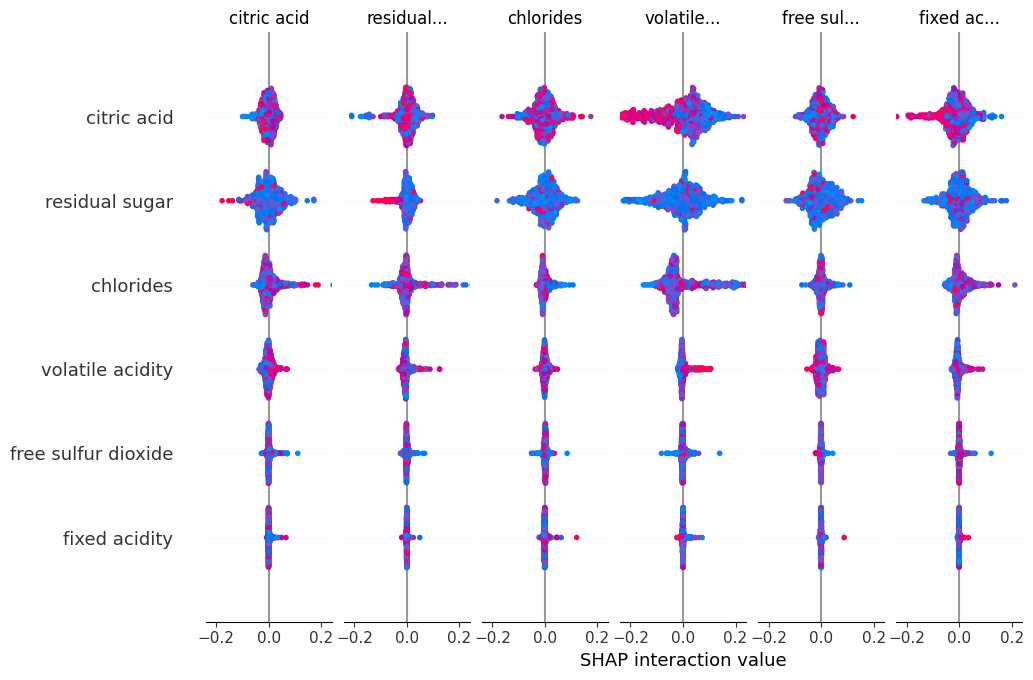

In [ ]:
# Visualize summary plot
shap.summary_plot(shap_values, X_test)

### Interpretation for plot

The SHAP interaction plot above visualizes the interaction effects between features. In the plot, each column represents a feature (like 'chlorides' or 'citric acid'), and each row represents how a specific feature interacts with others. The SHAP interaction values indicate how one feature's contribution to the prediction depends on the value of another feature. Positive SHAP values contribute to pushing predictions towards one class, while negative SHAP values push towards another.

The color indicates the interaction strength, and points spread along the horizontal axis indicate SHAP values for individual instances. This plot helps you identify feature pairs with strong interactions and understand how they influence the model's predictions together, which is valuable for capturing more complex relationships in the data.

`Strengths:`

- - Highlights complex interactions between features that would not be captured by standard feature importance.
Helps identify the most important and interdependent features, giving deeper insights into the model's behavior.

`Limitations:`

- Hard to interpret without domain knowledge, as the significance of interactions is not always clear from the plot alone.
- Does not explicitly quantify the interaction effect beyond visual representation.

`Potential Improvements:`

- Overlaying statistical summaries for interaction strength would provide more quantitative insight.
- Grouping similar features together (for example, by chemical property or category) would make it easier to interpret the broader relationships.`